# Exercise 5

Work on this before the next lecture on 8 May. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [3]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

## Question 1

You can use PCA as a form of noise filtering. The idea why this might work goes like this: overall the PCA components representing the noise will explain less of the variance in the dataset than the components related to the actual data. So if you keep only the high variance components you can remove (some) of the noise.

* plot some of the digits before and after the noise has been added
* fit a `PCA` transformer to the digit dataset
* experiment with the number of components you need to get a good reconstruction of the digits that supresses the noise.
* (bonus) is there a quantitative way to pick the best number of components?

(Note: You can use this for high dimensional tabular data as well. Instead of training your classifier on all the features you can first transform your data and only use the first "few" components, thereby removing the noise.)

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()

# fluctuate each pixel's intensity by drawing from a gaussian
# with mean equal to the pixels value and std=4
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)

The digit is a 0
## No noise ##


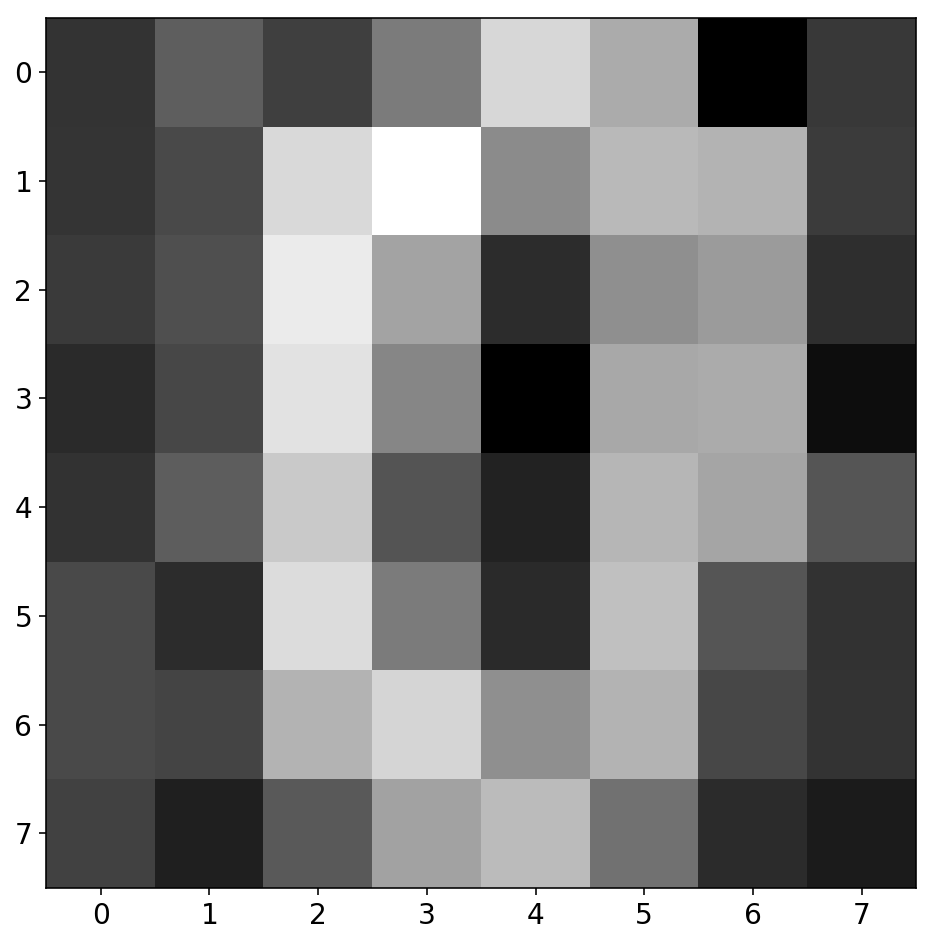

## With noise ##


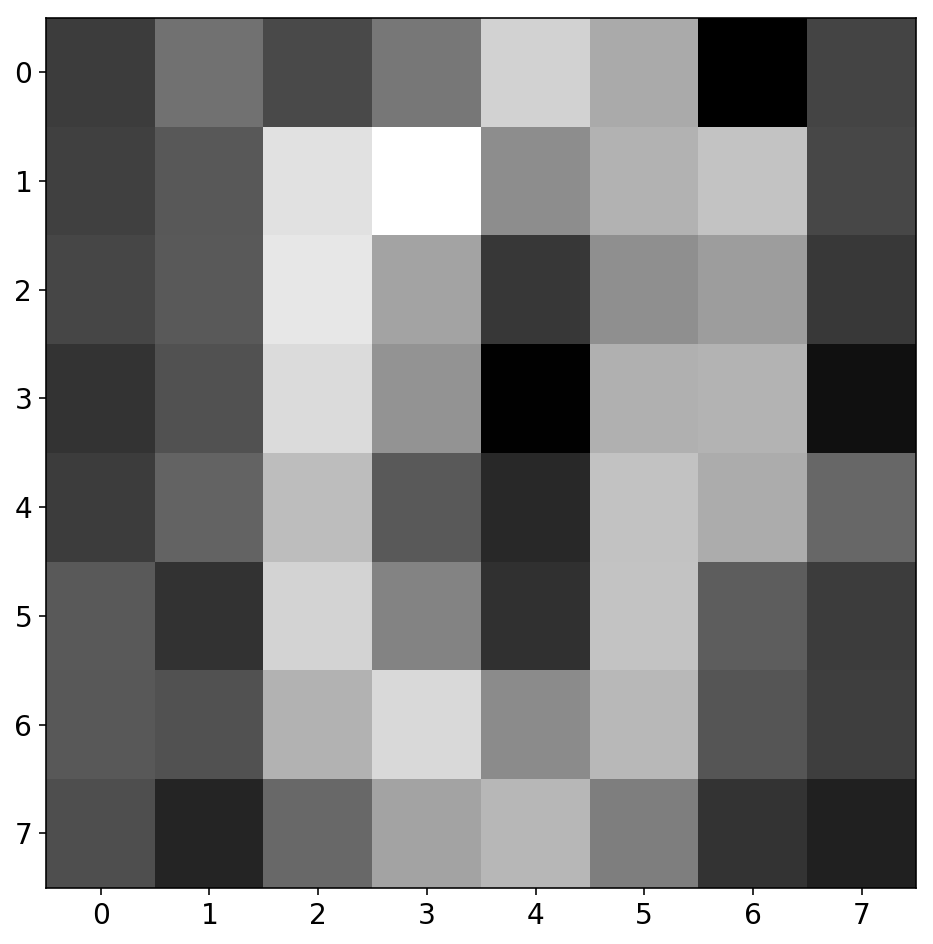

## Difference ##


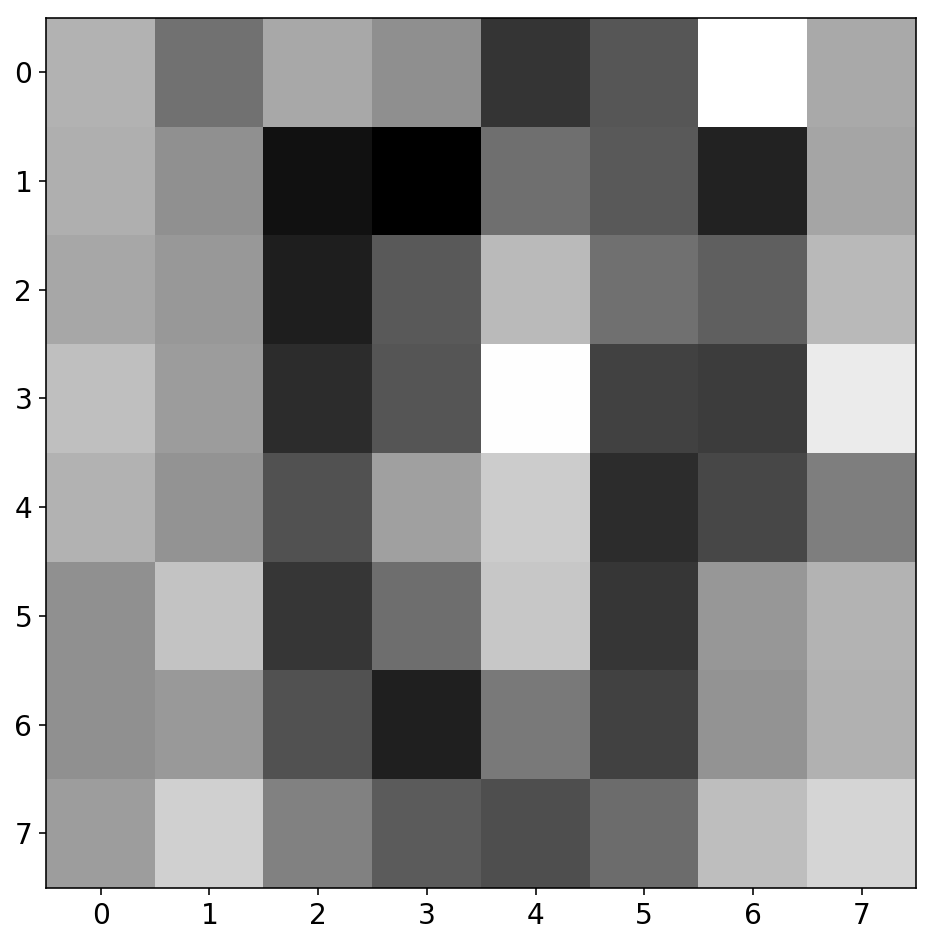

In [26]:
# your answer
from sklearn.decomposition import PCA
print('The digit is a %d' %(digits.target[10]))
print('## No noise ##')
plt.imshow(np.reshape(digits.data[10,:],(8,8)),cmap='gray')
plt.show()
temp = digits.data + noisy
print('## With noise ##')
plt.imshow(np.reshape(temp[10,:],(8,8)),cmap='gray')
plt.show()
print('## Difference ##')
plt.imshow(np.reshape(digits.data[10,:] - temp[10,:],(8,8)),cmap='gray')
plt.show()
noisy_data = digits.data + noisy

The digit is a 9


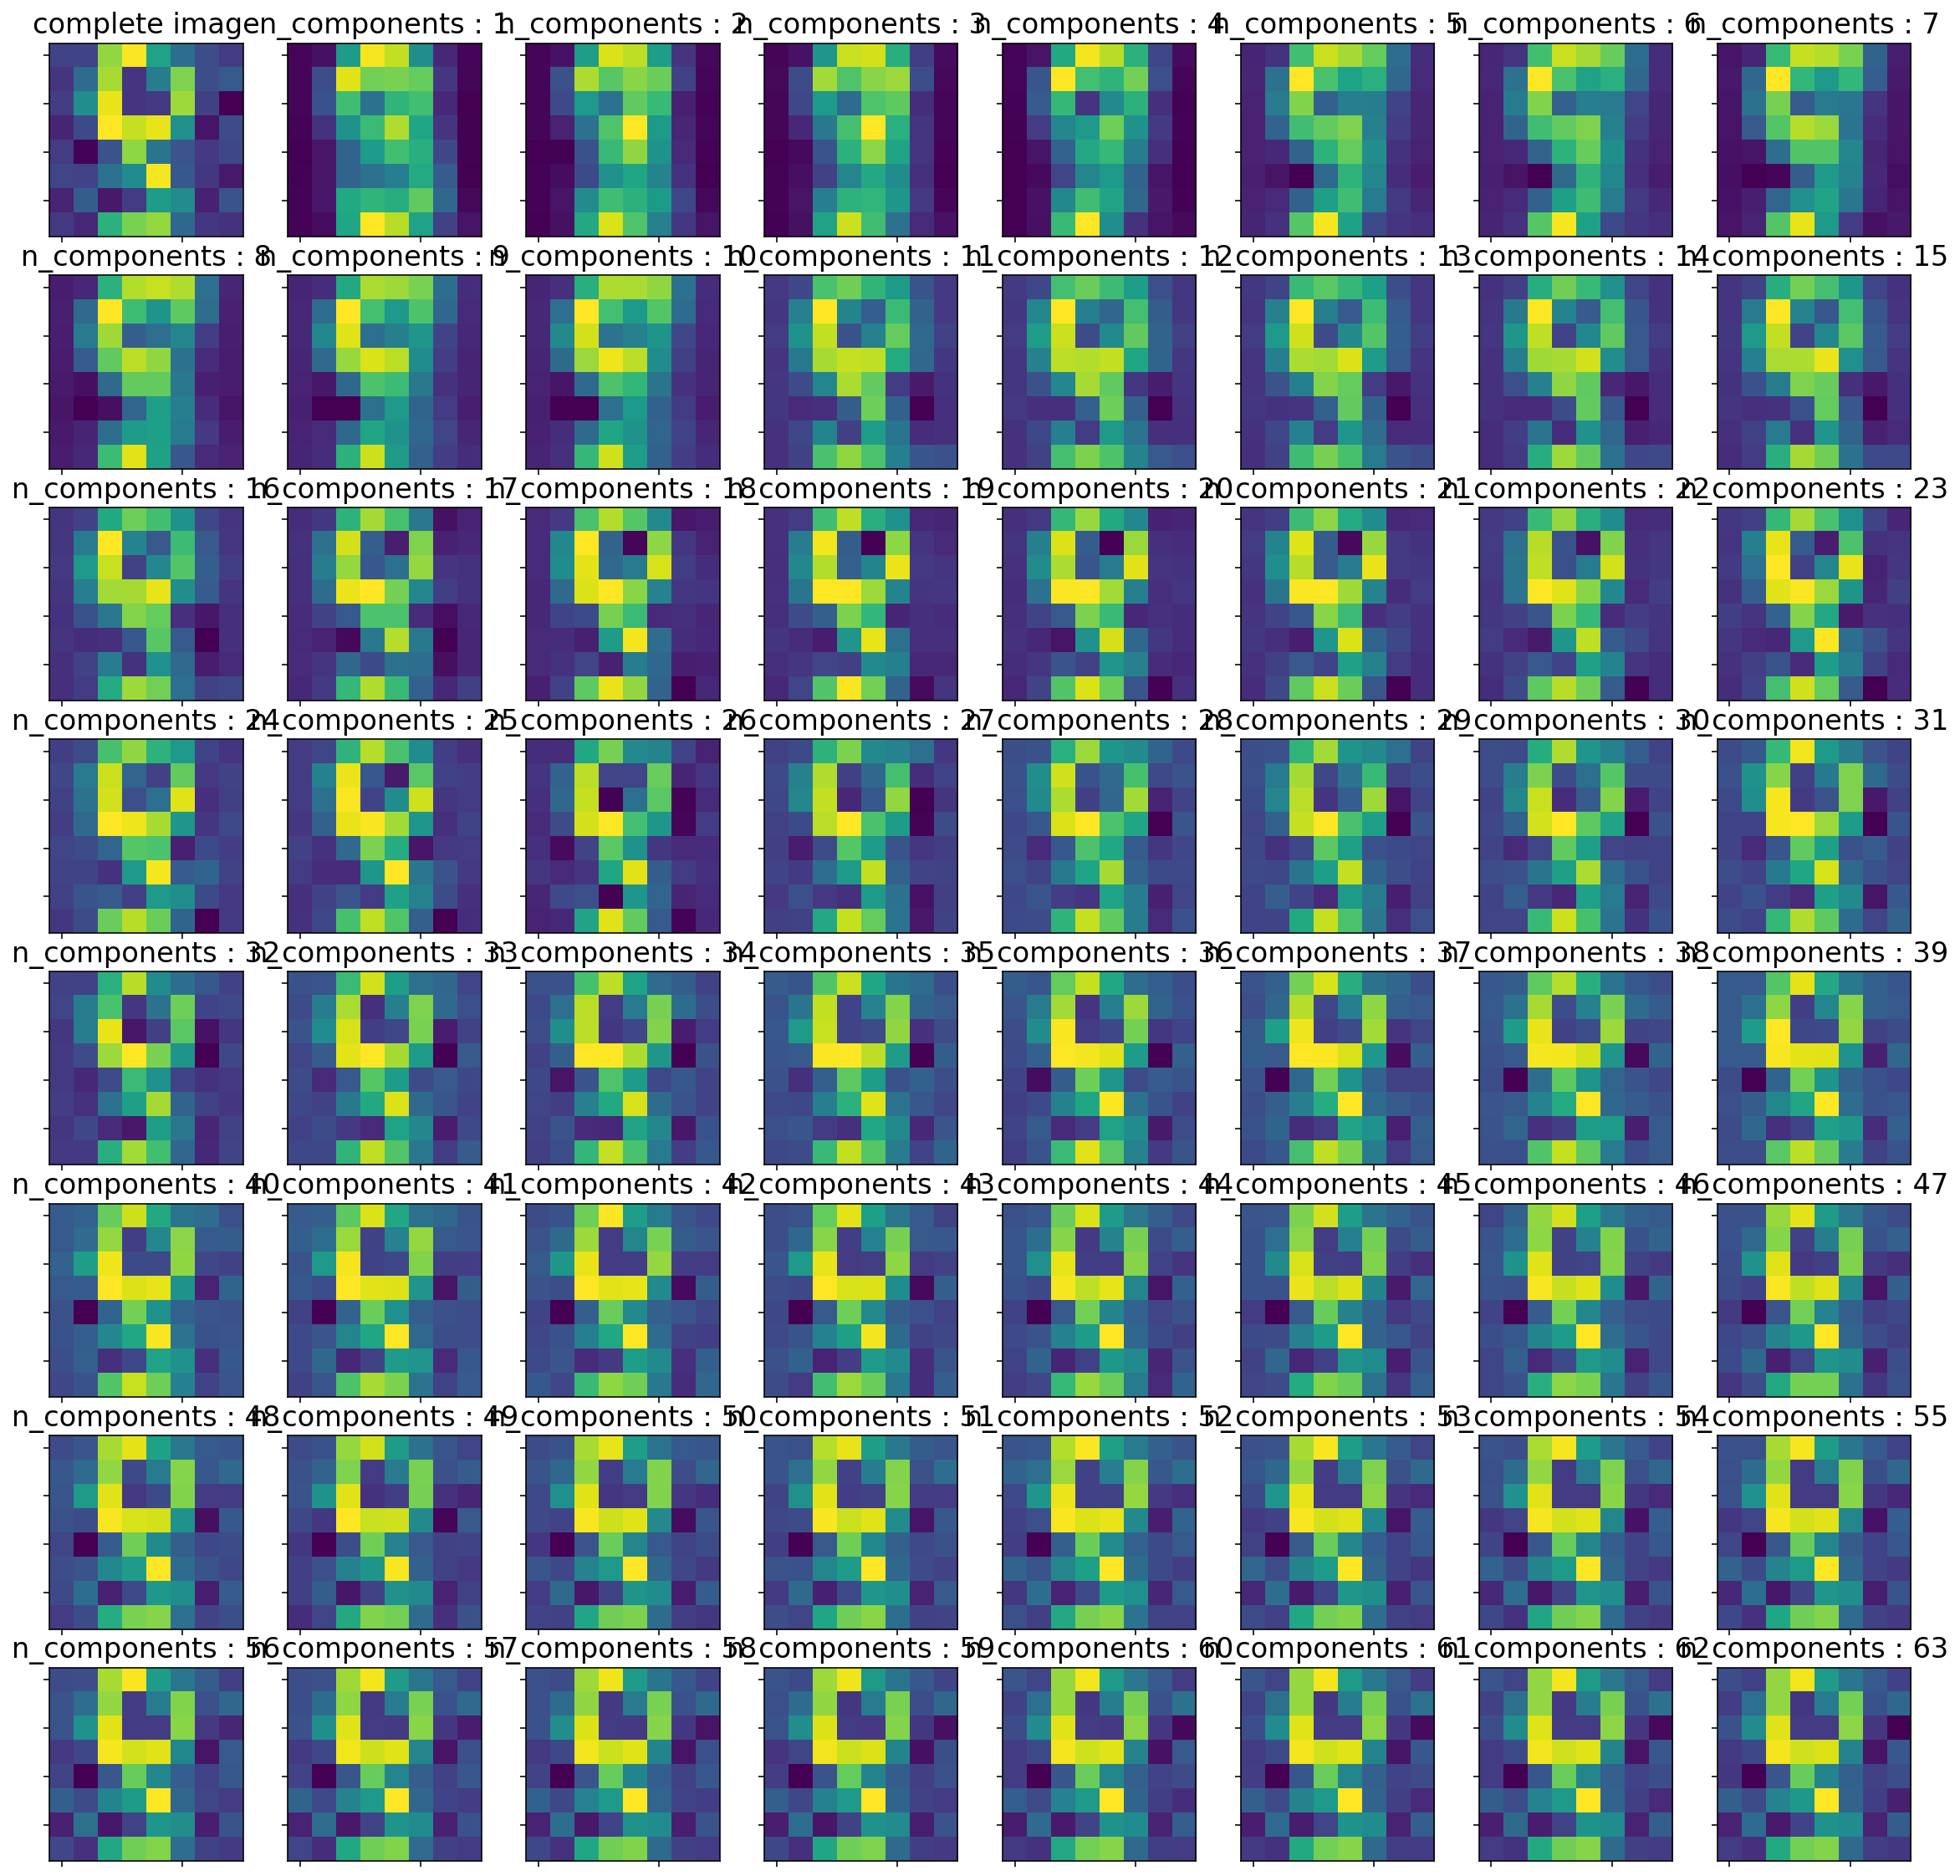

In [27]:
pca = [PCA(n_components=x) for x in range(1,65)]
transformed = [x.fit_transform(noisy_data) for x in pca]
retransformed = [x.inverse_transform(transformed[ind]) for (ind,x) in enumerate(pca)]
#retransformed = pca.inverse_transform(transformed)
# print('## Retransformed ##')
# for x in range(0,64,10):
#     print('Feature # %d' % (x))
#     plt.imshow(np.reshape(retransformed[x][10,:],(8,8)),cmap='gray')
#     plt.show()
    

print('The digit is a %d' %(digits.target[1100]))
fig, axs = plt.subplots(8, 8, figsize=(5*4, 5*4))
axs = axs.ravel()
axs[0].set_title('complete image without noise')
axs[0].imshow(np.reshape(digits.data[1100,:],(8,8)))
axs[0].set_yticklabels([])
axs[0].set_xticklabels([])

sum = np.zeros(64)
for n, ax in zip(range(64), axs[1:]):
    ax.imshow(np.reshape(retransformed[n][1100,:],(8,8)))
    ax.set_title('n_components : %i' % (n+1))
    ax.set_yticklabels([])
    ax.set_xticklabels([])


It seems about 15 features is sufficient for a good reproduction of the digit. 

A quantitative way to estimate the number of features could be the sum-of-squares of residues value.

(1797, 64)
()


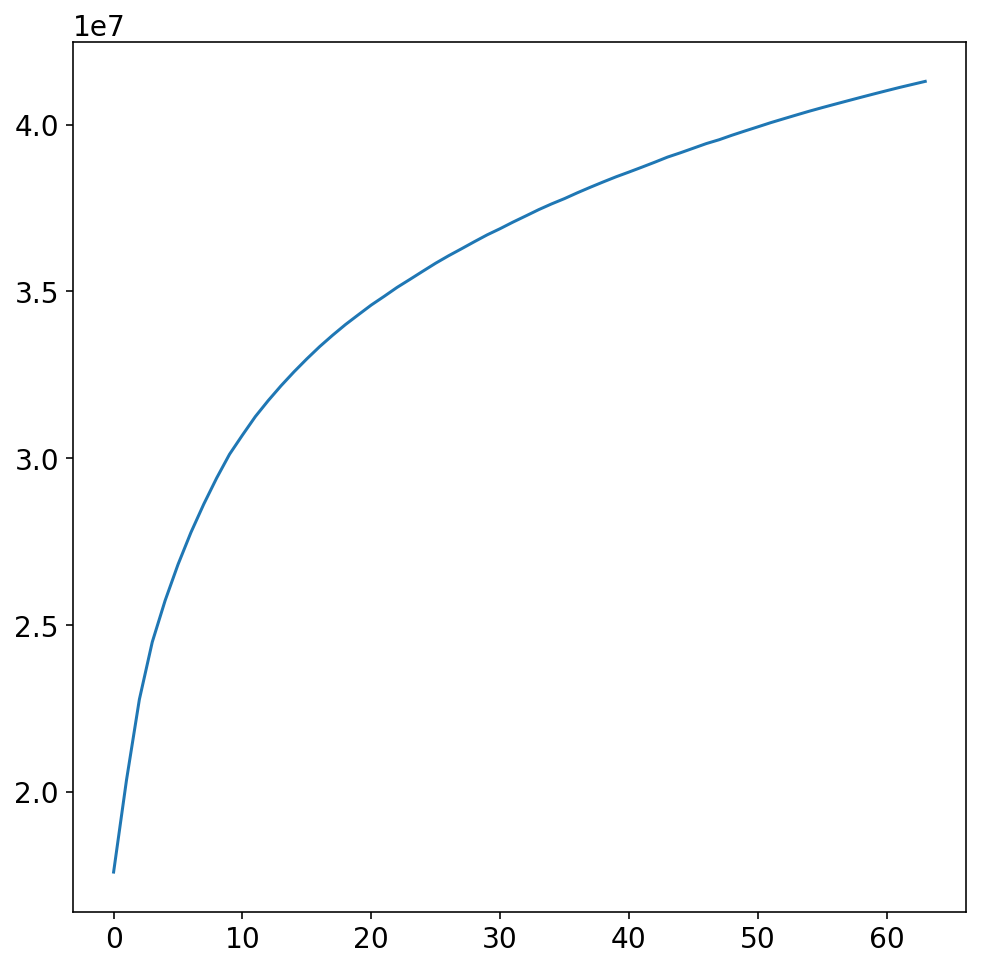

In [34]:
r2 = [x - digits.data[1110,:] for x in retransformed]
print(r2[0].shape)
r2 = [np.sum(x**2) for x in r2]
print(r2[0].shape)
plt.plot(r2)

---

## Question 2

Apply PCA to a dataset that contains two gaussian blobs. Imagine this is a toy version of a real problem where you are trying to separate the dark from the light points. Before using the `PCA` transformer make a prediction for the two principle components from your intuition.

* draw the principle components PCA finds
* reduce the dimensionality of the data to one dimension using the `transform` method of the `PCA` transformer
* plot your transformed dataset, can you separate the two classes using only the first principle component?
* A technique related to PCA that makes use of the class labels is called linear discriminant analysis (LDA). How does LDA perform on this problem?
* Can you explain why PCA fails?

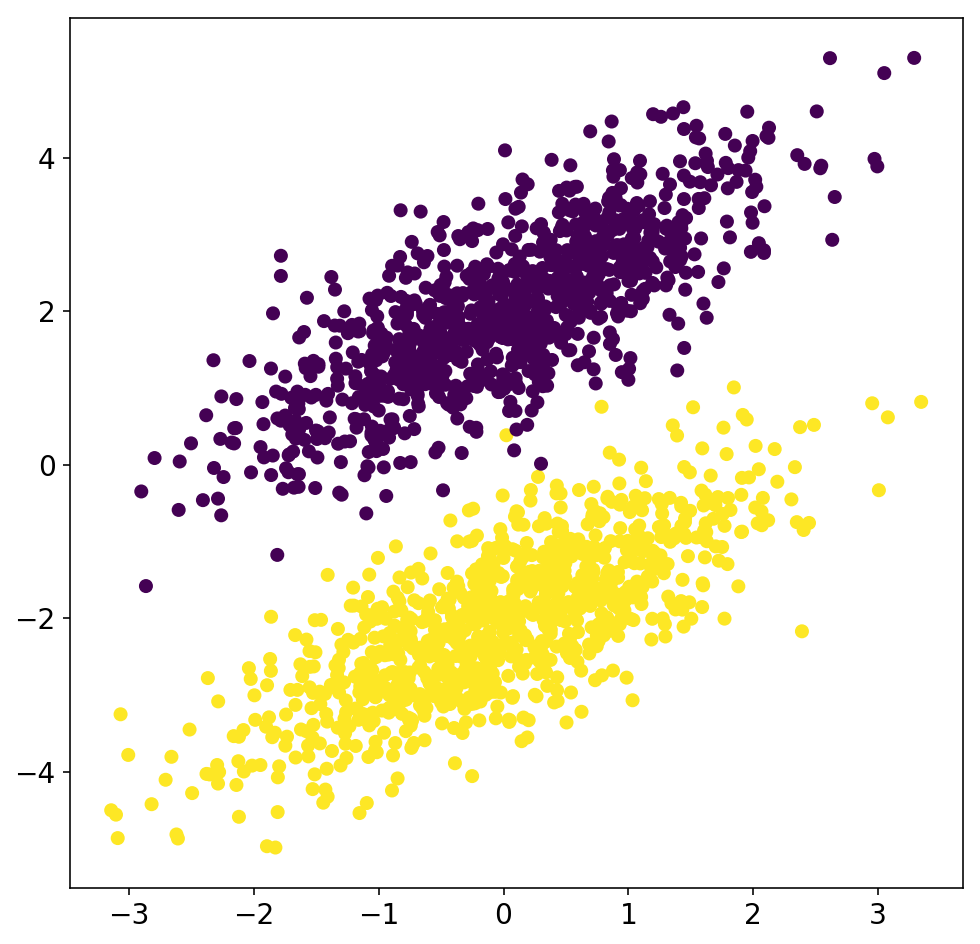

In [4]:
N = 1000
m1 = (1,1)
m2 = (1,4)
C = ((1,0.75), (0.75,1))
g1 = np.random.multivariate_normal((0, -2), C, N)
g2 = np.random.multivariate_normal((0, +2), C, N)

X = np.vstack((g1, g2))
y = np.hstack((np.ones(N), np.zeros(N)))
plt.scatter(X[:,0], X[:,1], c=y);

[[ 0.1877003   0.98222635]
 [ 0.98222635 -0.1877003 ]]


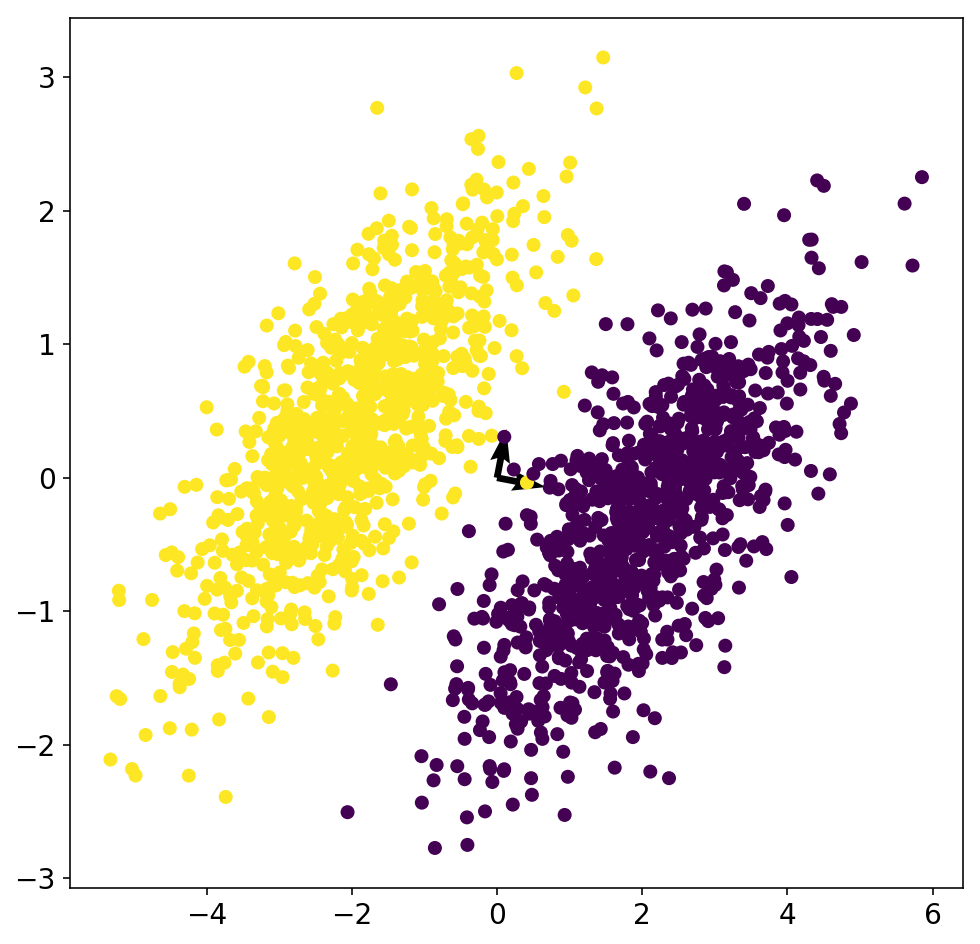

In [9]:
# your answer here
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
print(pca.components_)
#plt.scatter(X[:,0], X[:,1], c=y);
plt.quiver(pca.components_[0][0],pca.components_[0][1])
plt.quiver(pca.components_[1][0],pca.components_[1][1])
#plt.arrow(0,0,pca.components_[0][0],pca.components_[0][1])
#plt.arrow(0,0,pca.components_[1][0],pca.components_[1][1])
x_trans = pca.transform(X)
x_retrans = pca.inverse_transform(x_trans)
plt.scatter(x_trans[:,0],x_trans[:,1], c = y)

PCA fails because it discards the class information in this case and simply tries to find the directions along which the variance is maximized.

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
(2000, 2)
(2000, 1)
[[ 7.01367801 -9.16267937]]


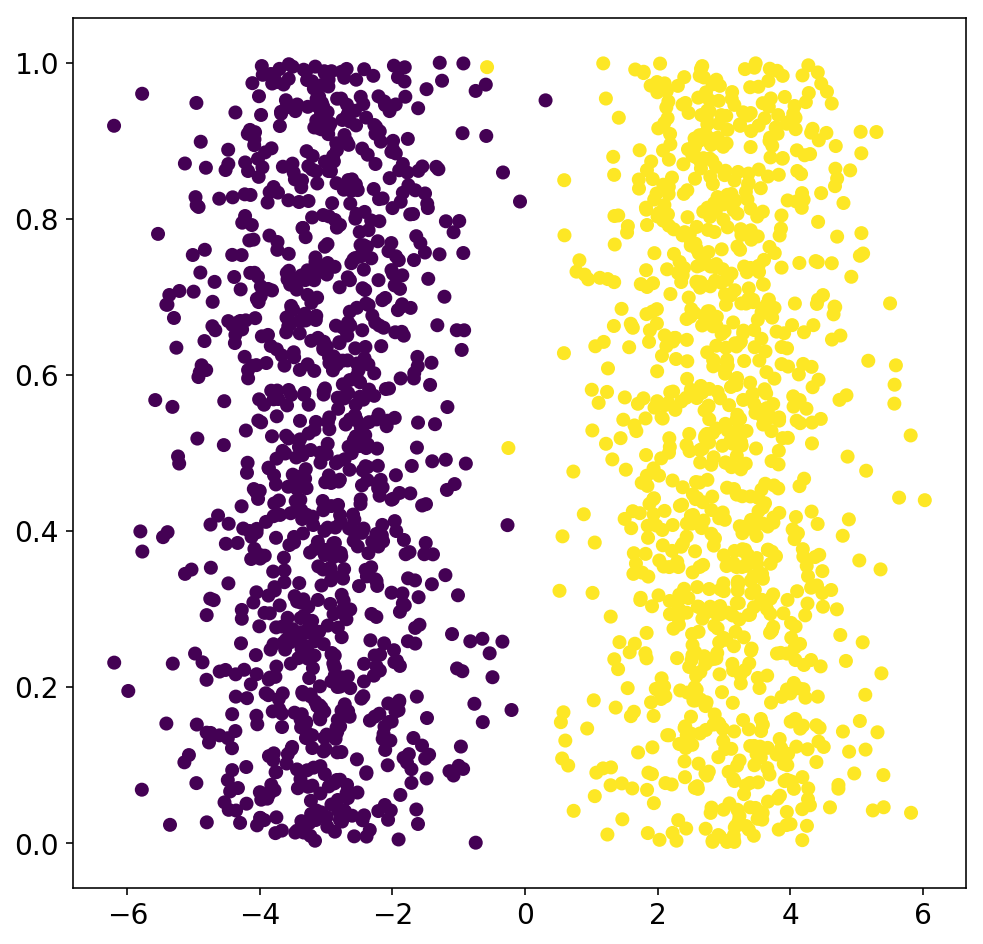

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components = 2)
print(clf)
print(X.shape)
clf.fit(X, y)
X_trans = clf.transform(X)
print(X_trans.shape)
print(clf.coef_)
plt.scatter(X_trans[:,0], np.random.rand(X_trans.shape[0]), c = y)

LDA, on the other hand, performs a 'supervised' dimensionality reduction. That is, it performs a feature transform that maximizes the class separation.

## Question 3

Create a simple Auto Encoder using `keras`. By forcing the input through a bottleneck we can hope that the auto encoder focusses on interesting structure in the data and ignores noise. Maybe auto encoders can be used to perform denoising.

* create your own auto encoder setup or start from the one shown in the lecture. You might have to construct a auto encoder that has more layers or uses more powerful transformations like `Conv2D`, `MaxPooling2D` and `Upsampling2D`.
* make sure to load the MNIST dataset from `keras` and not the digits dataset from scikit-learn. Create a noisy version of your digits by drawing pixel values from a gaussian with mean equal to each pixel's intensity and a small standard deviation (tip: start with little/no noise to debug your auto encoder and then slowly increase the noise)
* how do you need to modify the learning setup compared to the lecture where we use `X_train` both as input and as output?

(Bonus: can you learn an "auto encoder" that rotates clean digits by 90degrees? This shuold start you off thinking about using neural networks as general purpose "transformers".)

In [110]:
# your answer here
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D
from keras.models import Model
from sklearn.model_selection import train_test_split

# note: the MNIST dataset has more features and more samples than the digits
# dataset in scikit-learn
# Only load the training images, we don't need more and we do not care for the labels
(x_train, _), (_, _) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28)

X = x_train / 255


X_train, X_test = train_test_split(X, train_size=0.8, random_state=1)

encoding_dim = 32

input_img = Input(shape=(784,)) # input layer
encoded = Dense(encoding_dim, activation='relu')(input_img) #Dense layer 
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train,#hence 'auto' encoder
                epochs=50,
                batch_size=256,
                shuffle=True,
                verbose=False,
                validation_data=(X_test, X_test))
# shortcut to perform just the encoding
encoder = Model(input_img, encoded)

# shortcut to perform just the decoding step
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


X_encoded = encoder.predict(X_test)
X_decoded = decoder.predict(X_encoded)
n_images = 10
fig, axs = plt.subplots(2, 10, figsize=(n_images * 8, 8))
for i in range(n_images):
    # original
    ax = axs[0, i]
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # reconstruction
    ax = axs[1, i]
    ax.imshow(X_decoded[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

KeyboardInterrupt: 

In [106]:
def gauss_noise(x):
    mu, sigma = x, 1 # mean and standard deviation
    s = np.random.normal(mu, sigma)
    return s

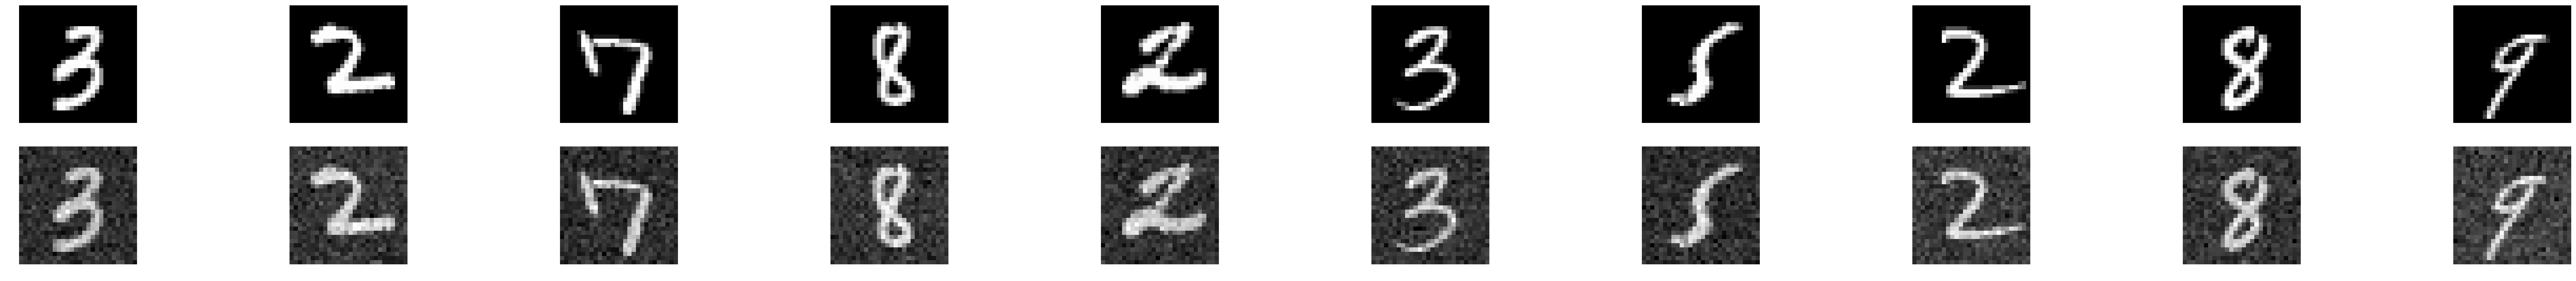

In [23]:
X_train, X_test = train_test_split(X, train_size=0.8, random_state=1)
fig, axs = plt.subplots(2, 10, figsize=(n_images * 8, 8))
for i in range(n_images):
    # original
    ax = axs[0, i]
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
vect_noise = np.vectorize(gauss_noise)
X_noisy_train = vect_noise(X_train)
X_noisy_test = vect_noise(X_test)
for i in range(n_images):
    # noisy
    ax = axs[1,i]
    ax.imshow(X_noisy[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
# diff = X_test - X_noisy
# for i in range(n_images):
#     # noisy
#     ax = axs[2,i]
#     ax.imshow(diff[i].reshape(28, 28), cmap='gray')
#     ax.axis('off')


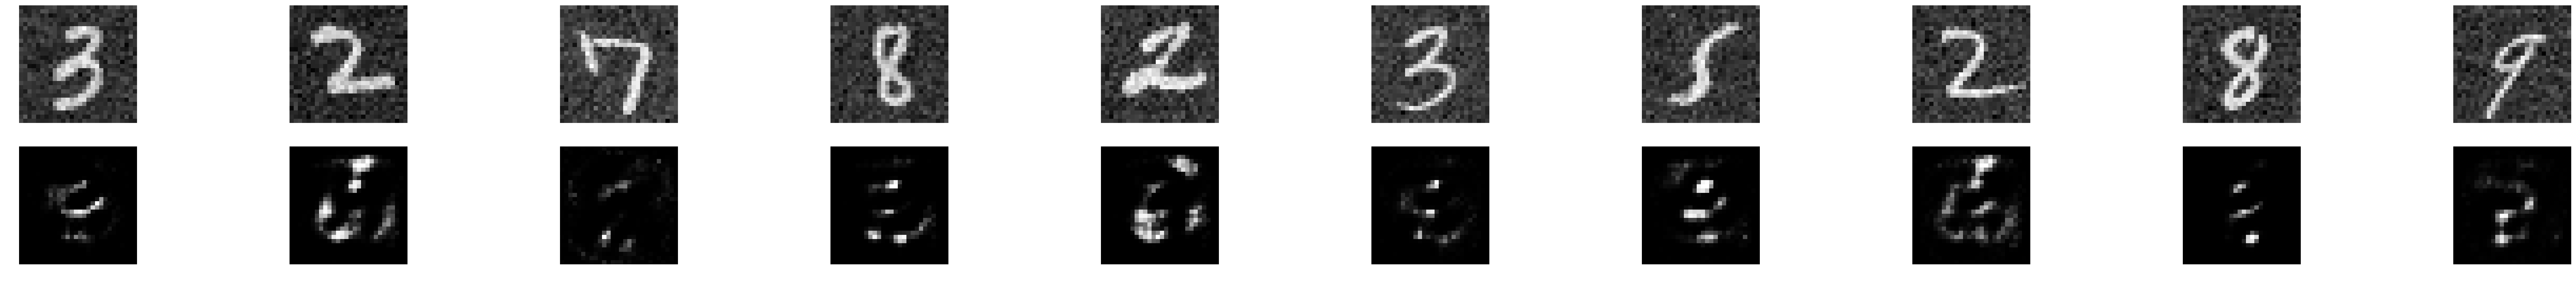

In [24]:
encoding_dim = 32

input_img = Input(shape=(784,)) # input layer
encoded = Dense(encoding_dim, activation='relu')(input_img) #Dense layer 
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder_noisy = Model(input_img, decoded)
autoencoder_noisy.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder_noisy.fit(X_noisy_train, X_train,#noise-free labels(output), noisy features(input) 
                epochs=50,
                batch_size=256,
                shuffle=True,
                verbose=False,
                validation_data=(X_test, X_test))
# shortcut to perform just the encoding
encoder = Model(input_img, encoded)

# shortcut to perform just the decoding step
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
X_encoded = encoder.predict(X_noisy_test)
X_decoded = decoder.predict(X_encoded)
n_images = 10
fig, axs = plt.subplots(2, 10, figsize=(n_images * 8, 8))
for i in range(n_images):
    # original
    ax = axs[0, i]
    ax.imshow(X_noisy_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # reconstruction
    ax = axs[1, i]
    ax.imshow(X_decoded[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

32 features are obviously not enough to recover the de-noised digits, even if it was fine when there was no noise. So we need to take care of the noise by some kind of low-pass filter (max pooling?), or edge detection(convolutional filter). Let's try this...

In [107]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K

batch_size = 128
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_noisy_train = vect_noise(x_train)
X_noisy_test = vect_noise(x_test)


X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
X_noisy_train = X_noisy_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
X_noisy_test = X_noisy_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32') #works better with floats?
X_test = X_test.astype('float32') #works better with floats?
X_noisy_train = X_train.astype('float32') #works better with floats?
X_noisy_test = X_test.astype('float32') #works better with floats?
X_train /= 255 #normalize between [0,1]
X_test /= 255
X_noisy_train /= 255 #normalize between [0,1]
X_noisy_test /= 255

False
False
False
False
False
False
False
False
False
False


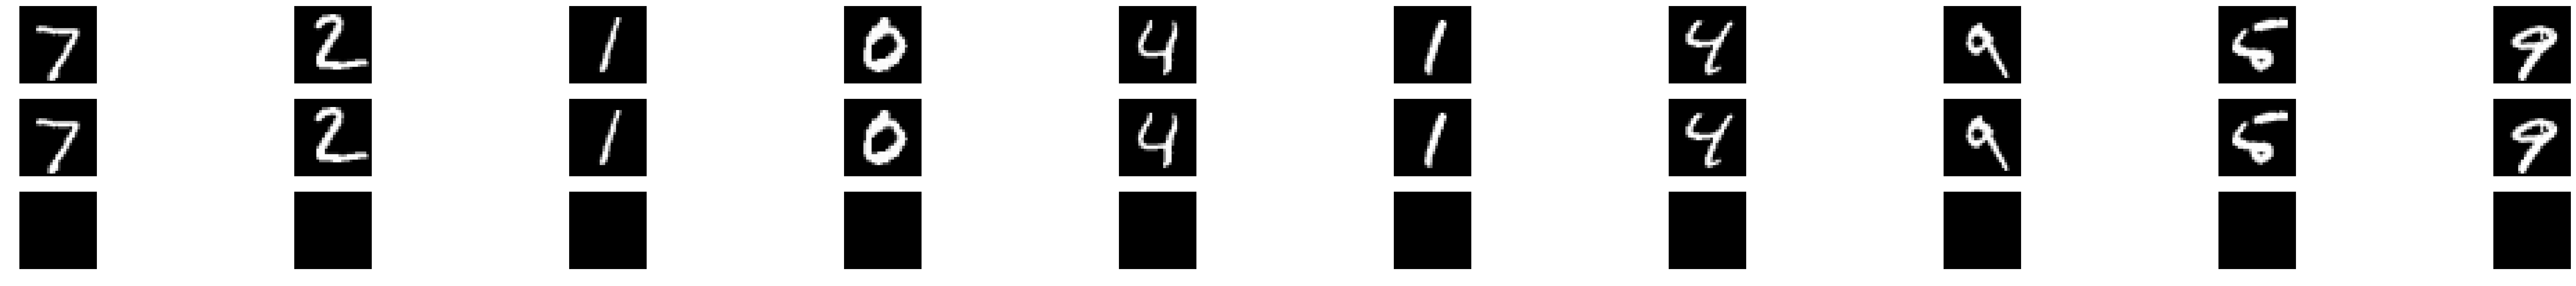

In [109]:
# from keras.utils import plot_model
# #print('x_train shape:', x_train.shape)
# #print(x_train.shape[0], 'train samples')
# #print(x_test.shape[0], 'test samples')


# #input_shape = (1, img_rows, img_cols)
# # input_img = Input(shape=input_shape) # input layer
# # encoded = Dense(128, activation='relu')(input_img) #Dense layer 
# # encoded = Conv2D(64, (3, 3), activation='relu')(encoded) #3x3 convolution layer of 64 filters
# # #model.add(MaxPooling2D(pool_size=(2, 2))) #pool 2x2  squares
# # decoded = Dense((28,28), activation='sigmoid')(encoded)

# # autoencoder_noisy = Model(input_img, decoded)
# # autoencoder_noisy.compile(optimizer='adadelta', loss='binary_crossentropy')
# # autoencoder_noisy.fit(X_noisy_train, X_train,#noise-free labels(output), noisy features(input) 
# #                 epochs=50,
# #                 batch_size=256,
# #                 shuffle=True,
# #                 verbose=False,
# #                 validation_data=(X_test, X_test))
# # # shortcut to perform just the encoding
# # encoder = Model(input_img, encoded)
# print(input_shape)
# print(x_noisy_train.shape)
# print(x_train.shape)
# print(K.image_data_format())
# model = Sequential()
# model.add(Conv2D(64, kernel_size=(3, 3),#apply 32 3x3 filters to the input images
#                      activation='relu',
#                      input_shape=(28,28,1), data_format="channels_last", padding='same'))
# model.add(Dense(units=1))
# model.compile(loss='binary_crossentropy', optimizer='adadelta')
# model.summary()
# model.fit(x_noisy_train[0:100], x_train[0:100], batch_size=batch_size, epochs=epochs, verbose=0, validation_data = (x_noisy_test,x_test))

X_decoded = model.predict(X_noisy_test)
n_images = 10
fig, axs = plt.subplots(3, 10, figsize=(n_images * 8, 8))
for i in range(n_images):
    # original
    ax = axs[0, i]
    ax.imshow(X_test[i].reshape(28,28), cmap='gray')
    ax.axis('off')
    # noisy
    ax = axs[1, i]
    ax.imshow(X_noisy_test[i].reshape(28,28), cmap='gray')
    ax.axis('off')

    # reconstruction
    ax = axs[2, i]
    ax.imshow(X_test[i].reshape(28,28) - X_noisy_test[i].reshape(28,28), cmap='gray')
    ax.axis('off')
    print((X_test[i].reshape(28,28) - X_noisy_test[i].reshape(28,28)).any())


---

## (Bonus) Question 4

Using your auto encoder architecture from the previous question, a clean MNIST dataset, and the ideas from the "visual search" notebook can you create a search engine that can find images similar to the query image?

In [ ]:
# your answer here